<div class="alert alert-success">
<h1>Bayesian Linear Regression</h1>
<h2>ASI Lab - 23/03/2017</h2>
</div>

## Part 1. Linear Regression
### Loss minimization

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio
from scipy.stats import beta
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 7.0)

<div class="alert alert-success">
Our data is a csv file with the year of the olympics and the winning time of the 100 m track and field men's race.
We import the csv file with the numpy function *genfromtxt* and we print all the file since we have just 27 rows.
</div>

In [64]:
male100 = np.genfromtxt("Lab1/olympics.csv", delimiter=",")
print(male100)
x = male100[:,0]
t = male100[:,1]

[[ 1896.      12.  ]
 [ 1900.      11.  ]
 [ 1904.      11.  ]
 [ 1906.      11.2 ]
 [ 1908.      10.8 ]
 [ 1912.      10.8 ]
 [ 1920.      10.8 ]
 [ 1924.      10.6 ]
 [ 1928.      10.8 ]
 [ 1932.      10.3 ]
 [ 1936.      10.3 ]
 [ 1948.      10.3 ]
 [ 1952.      10.4 ]
 [ 1956.      10.5 ]
 [ 1960.      10.2 ]
 [ 1964.      10.  ]
 [ 1968.       9.95]
 [ 1972.      10.14]
 [ 1976.      10.06]
 [ 1980.      10.25]
 [ 1984.       9.99]
 [ 1988.       9.92]
 [ 1992.       9.96]
 [ 1996.       9.84]
 [ 2000.       9.87]
 [ 2004.       9.85]
 [ 2008.       9.69]
 [ 2012.       9.63]]


<div class="alert alert-warning">
We'll now plot the data.
</div>

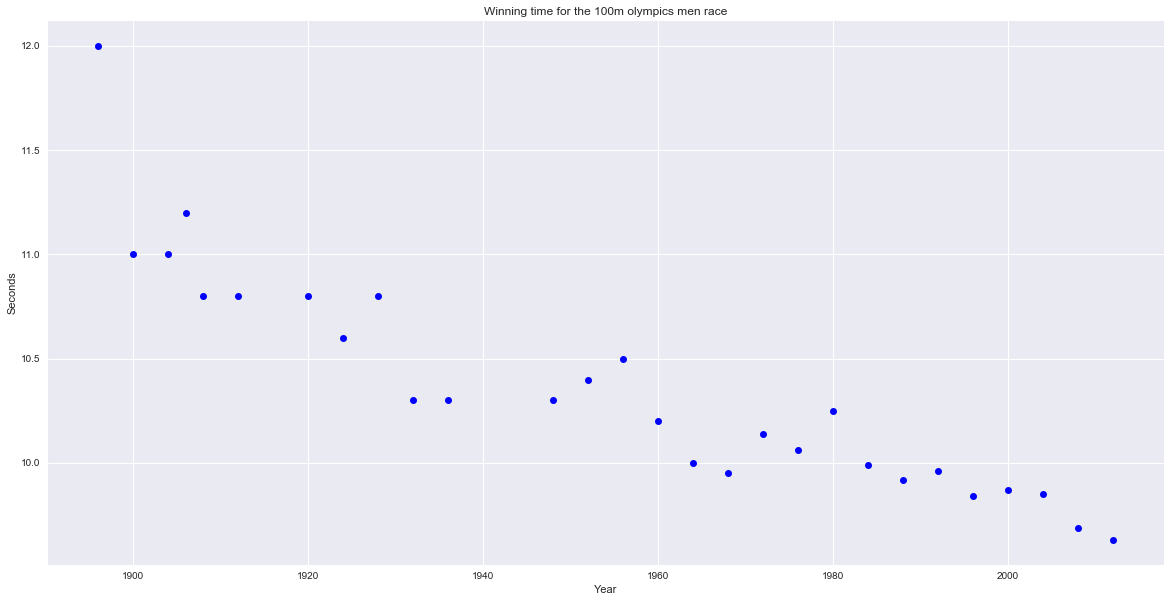

In [65]:
plt.figure(figsize=(20,10))
plt.plot( x, t, "bo")
plt.xlabel('Year')
plt.ylabel('Seconds')
plt.grid(True,which="both",ls="-")
plt.title('Winning time for the 100m olympics men race')
plt.show()

<div class="alert alert-warning">
We’ll now ﬁt the model t = w0 + w1\*x to our data.
</div>

In [66]:
def lsfit(x, t):
    xmu = np.mean(x)
    tmu = np.mean(t)
    xt = np.multiply(x, t) #element-wise multiplication
    xtmu = np.mean(xt)
    x2 = np.multiply(x, x)
    x2mu = np.mean(x2)
    w1 = (xtmu - (xmu*tmu))/(x2mu-xmu**2)
    w0 = tmu - (w1*xmu)
    #computing the loss
    avgLoss = np.mean(np.square(t-w0-w1*x))
    return (w0, w1, avgLoss)

In [67]:
w0, w1, avgLoss = lsfit(x, t)
print ("w0 is: ", w0)
print ("w1 is: ", w1)
print ("The average loss is: ", avgLoss)

w0 is:  36.3091204097
w1 is:  -0.0132753238218
The average loss is:  0.0485492819391


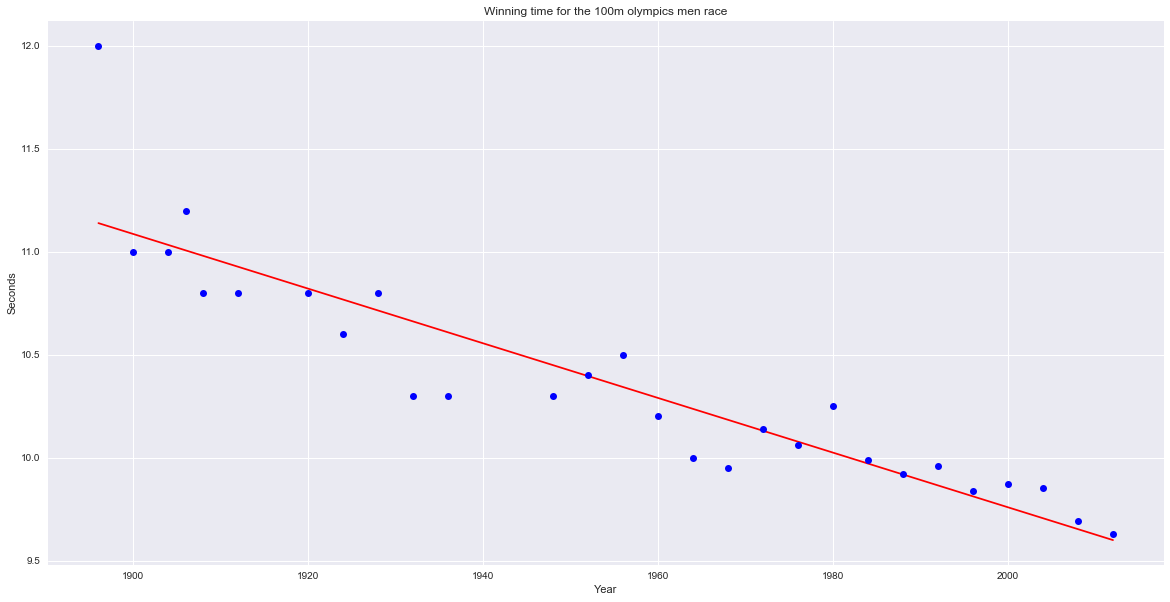

In [68]:
#we plot the data of the olympic 100m race
plt.figure(figsize=(20,10))
#plot for the full ecdf
plt.plot( x, (w0+(w1*x)), "r-", x, t, "bo")
plt.xlabel('Year')
plt.ylabel('Seconds')
plt.grid(True,which="both",ls="-")
plt.title('Winning time for the 100m olympics men race')
plt.show()

<div class="alert alert-warning">
Since we also have the women's times of the 100m olympic race, we could try to plot that data.
</div>

In [69]:
female100 = np.genfromtxt("Lab1/female100.txt", delimiter=",")
print(female100)

[[ 1928.      12.2 ]
 [ 1932.      11.9 ]
 [ 1936.      11.5 ]
 [ 1948.      11.9 ]
 [ 1952.      11.5 ]
 [ 1956.      11.5 ]
 [ 1960.      11.  ]
 [ 1964.      11.4 ]
 [ 1968.      11.  ]
 [ 1972.      11.07]
 [ 1976.      11.08]
 [ 1980.      11.06]
 [ 1984.      10.97]
 [ 1988.      10.54]
 [ 1992.      10.82]
 [ 1996.      10.94]
 [ 2000.      11.12]
 [ 2004.      10.93]
 [ 2008.      10.78]]


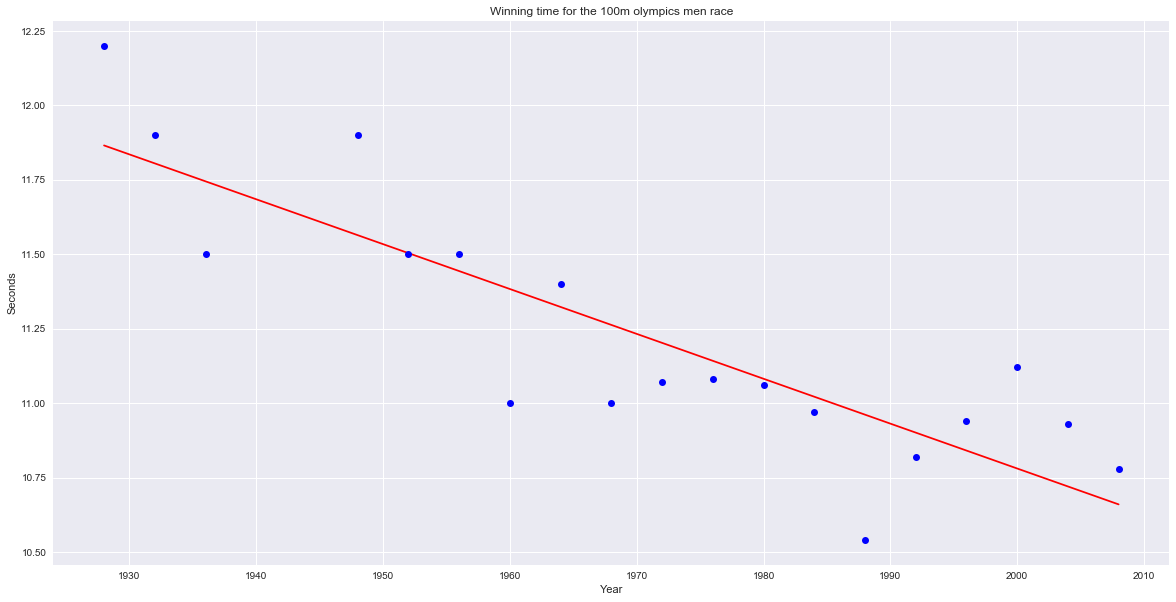

In [70]:
xfemale = female100[:,0]
tfemale = female100[:,1]
w0female, w1female, avgLossfemale = lsfit(xfemale, tfemale)
plt.figure(figsize=(20,10))
plt.plot( xfemale, (w0female+(w1female*xfemale)), "r-", \
         xfemale, tfemale, "bo")
plt.xlabel('Year')
plt.ylabel('Seconds')
plt.grid(True,which="both",ls="-")
plt.title('Winning time for the 100m olympics men race')
plt.show()

### Loss minimization in vector form

Now we'll do again the linear regression in vector form.

In [71]:
#least squares in matrix form
#first step is to create matrix X where each column is the vector x
#to the power k where k is the index of the column
X = [x**0, x**1]

#actually let's write a function where we can decide the polynomial
#order to fit.
def matrixOrder(x, k):
    X = np.array([x**y for y in range(k+1)])
    X = X.transpose()
    return X

Let's write a function to compute the matrix form of the least squares:
\begin{equation*}
\hat{w} = (\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T t
\end{equation*}

In [72]:
def lsfitVectorForm(X, t):
    #X = np.mat(X)
    Xt = np.transpose(X)
    #w_hat = (X.T * X).I * X.T * np.mat(t).T
    w_hat = np.linalg.inv(Xt.dot(X)).dot(Xt).dot(t.reshape((len(t), 1)))
    return w_hat

In [73]:
k = 3
X = matrixOrder(x, k)
w_hat = lsfitVectorForm(X, t)
print(w_hat)

[[  2.28913637e+04]
 [ -3.49237312e+01]
 [  1.77708315e-02]
 [ -3.01467209e-06]]


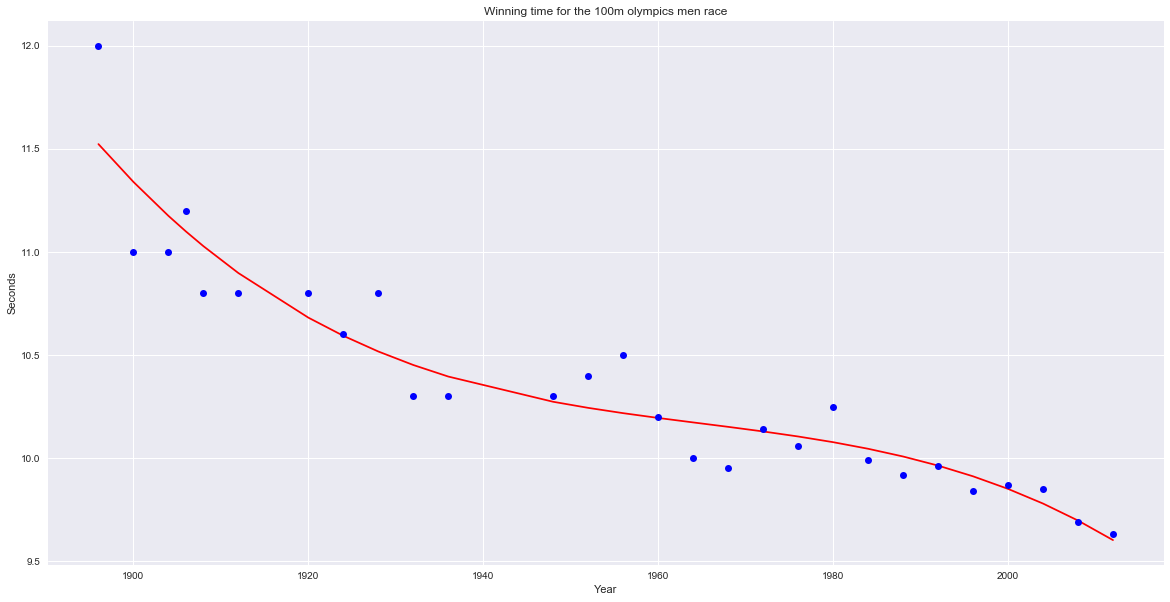

In [74]:
plt.figure(figsize=(20,10))
plt.plot(x, X.dot(w_hat), "r-", \
         x, t, "bo")
plt.xlabel('Year')
plt.ylabel('Seconds')
plt.grid(True,which="both",ls="-")
plt.title('Winning time for the 100m olympics men race')
plt.show()

In [75]:
x_test=np.array(range(2012,2017))
X_test=matrixOrder(x_test, k)
predictions = np.dot(X_test, w_hat)
print(predictions)

[[ 9.60183229]
 [ 9.57601794]
 [ 9.54933403]
 [ 9.5217625 ]
 [ 9.49328524]]


Let's automate the process of making predictions and write a function that, when given x and x test, computes w_hat and makes predictions at x_test.

In [76]:
def makePredictions(x, t, x_test, order=1):
    X = matrixOrder(x, order)
    X_test = matrixOrder(x_test, order)
    w_hat = lsfitVectorForm(X, t)
    predictions = X_test.dot(w_hat)
    return predictions

In [77]:
print(makePredictions(x, t, x_test, k))

[[ 9.60183229]
 [ 9.57601794]
 [ 9.54933403]
 [ 9.5217625 ]
 [ 9.49328524]]


Since the dataset of the olympics game is quite small, let's try to test our code on different datasets.

In [78]:
#Generate data from a third order polynomial
x = np.random.rand(50)
x = np.sort(x)
x_test = np.random.rand(200)
x_test = np.sort(x_test)
noise = 0.5
t = 5*(x**3)-(x**2)+x+np.random.rand(50)*noise
tt = 5*(x_test**3)-(x_test**2)+x_test+np.random.rand(200)*noise

In [79]:
predictions = makePredictions(x, t, x_test, 2)
meanerr = ((predictions-tt)**2).mean()
print(meanerr)

3.88980177269


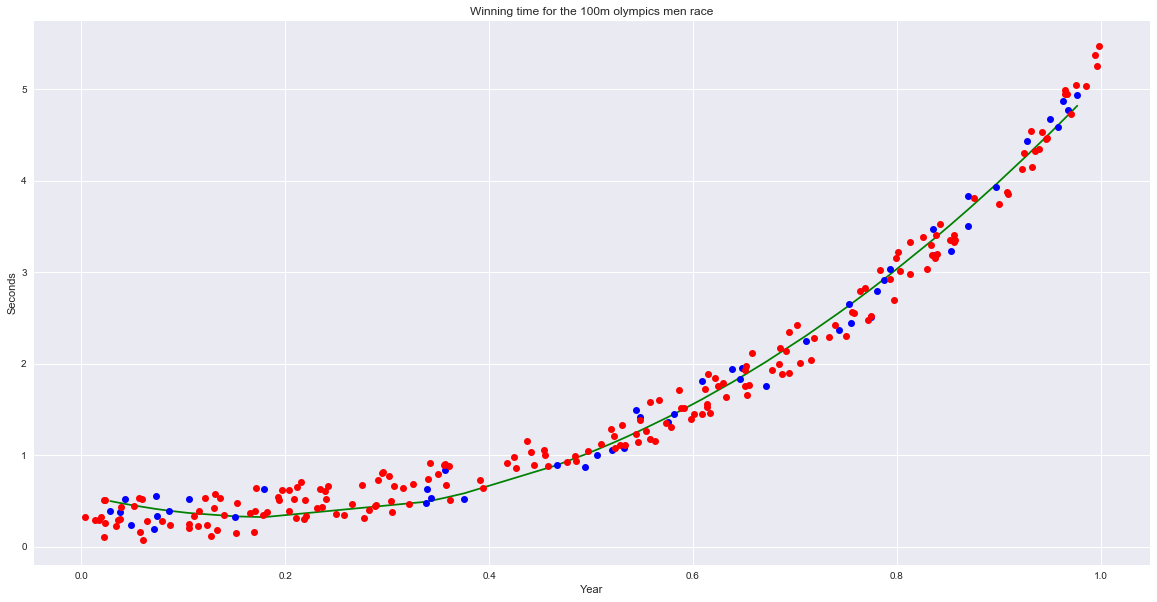

In [80]:
plt.figure(figsize=(20,10))
X = matrixOrder(x, 2)
w_hat = lsfitVectorForm(X, t)
plt.plot(x, X.dot(w_hat), "g-", \
         x, t, "bo", \
         x_test, tt, "ro")
plt.xlabel('Year')
plt.ylabel('Seconds')
plt.grid(True,which="both",ls="-")
plt.title('Winning time for the 100m olympics men race')
plt.show()

** Let's do Leave-One-Out Cross Validation (LOOCV)**
First of all we'll need to write a loop that removes the data-points one by one, ﬁnd w_hat on the reduced dataset and then compare the prediction on the removed data-point and compare it to the true value.

Mean error from cross-validation: 0.03


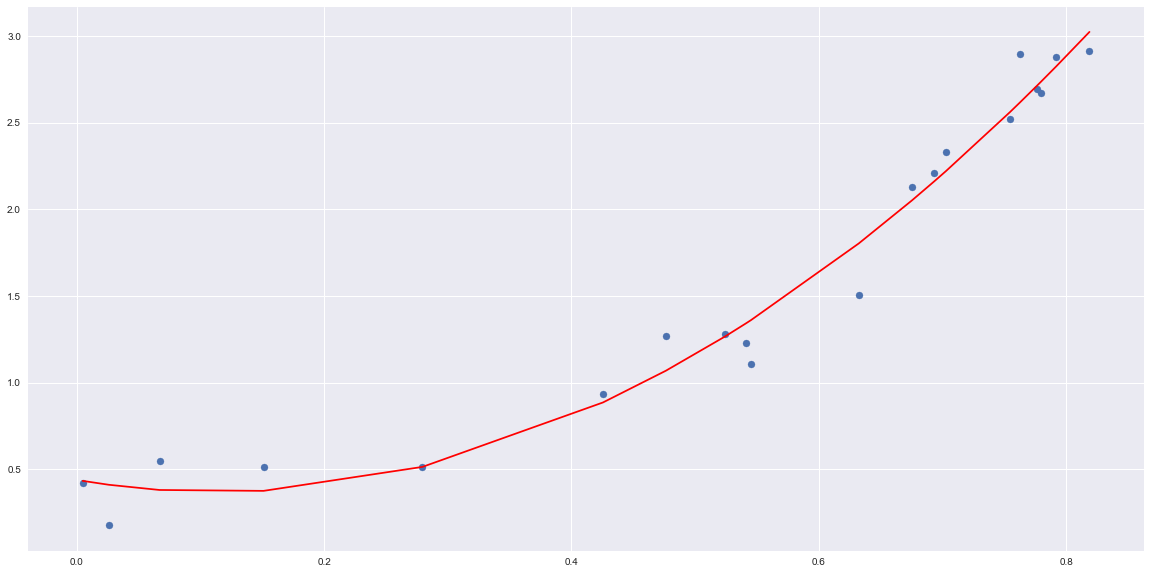

In [81]:
def cross_validation(x, t, k = 1):
    err = np.zeros(x.size)
    for i in range(x.size):
        train_x = np.delete(x, i)
        train_t = np.delete(t, i)
        test_x = np.take(x, i)
        test_t = np.take(t, i)
        pred = makePredictions(train_x, train_t, test_x, k)
        err[i] = ((pred - test_t) ** 2).mean()

    mean_err = err.mean()
    return mean_err

k = 2
noise = 0.5
x = np.random.rand(20)
x.sort()

t = 5 * x**3 - x**2 + x + np.random.rand(20) * noise
mean_err = cross_validation(x, t, k)
print('Mean error from cross-validation: %.2f' % mean_err)

X = matrixOrder(x, k)
w_hat = lsfitVectorForm(X, t)

fig, ax = plt.subplots()
points = ax.scatter(x, t)

fit = ax.plot(x, X.dot(w_hat), color='red')

plt.show()

[  1.39215453e-01   2.98172841e-02   3.05665080e-02   3.27327808e-02
   4.01732417e-02   5.34156680e-02   9.04910713e-02   1.13393927e-01
   1.82013865e-01   2.80454937e+00   5.62794327e+02   1.92040557e+02]


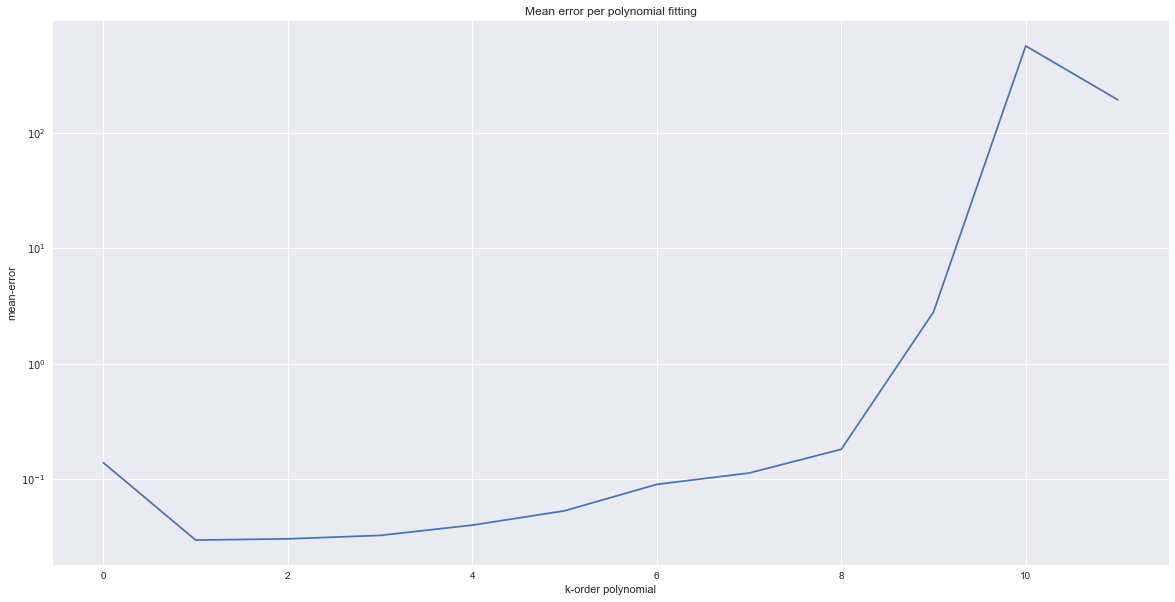

In [82]:
order = 12
orders = np.array(range(order))
avg_err = np.zeros(order)
for k in orders:
    avg_err[k] = cross_validation(x, t, k+1)
    
print(avg_err)

plt.plot(orders, avg_err)
plt.title("Mean error per polynomial fitting")
plt.xlabel("k-order polynomial")
plt.ylabel("mean-error")
plt.yscale("log")
plt.show()

## Part 2. Bayesian Linear Regression

### Maximum Likelihood

Using the ML estimators given in the lectures, compute $\hat{w}$ and $\hat{\sigma^2}$ on the Olympic data for polynomials of ﬁrst, second and third order.  
\begin{align}
t &= w_0 + w_1 x \\
t &= w_0 + w_1 x + w_2 x^2 \\
t &= w_0 + w_1 x + w_2 x^2 + w_3 x^3
\end{align}

To compute $\hat{\sigma^2}$ we use:

\begin{equation}
\hat{\sigma^2} = \frac{1}{N}(\mathbf{t}-\mathbf{X}\hat{\mathbf{w}})^T (\mathbf{t}-\mathbf{X}\hat{\mathbf{w}})
\end{equation}

In [83]:
def sigmasquare(X, t):
    w_hat = lsfitVectorForm(X, t)
    return (((t-X.dot(w_hat))).T.dot(t-X.dot(w_hat)))/t.size

In order to do this, we have to rescale the olympics data

In [84]:
x = male100[0:-1,0]
t = male100[0:-1,1]
t = np.reshape(t, (len(t), 1))
minval = x.min()
x = x-minval
x = x/4

test_x = ([2012]-minval)/4

In [85]:
#order is the orders of polynomial we want to see
order = 6

sigmasquares = np.zeros(order)
for k in np.arange(order):
    X = matrixOrder(x, k)
    #print(x.shape, t.shape, X.shape, w_hat.shape)
    sigmasquares[k] = sigmasquare(X, t)
    
print(sigmasquares)

[ 0.26809246  0.05030711  0.03795855  0.02961132  0.02706031  0.02349551]


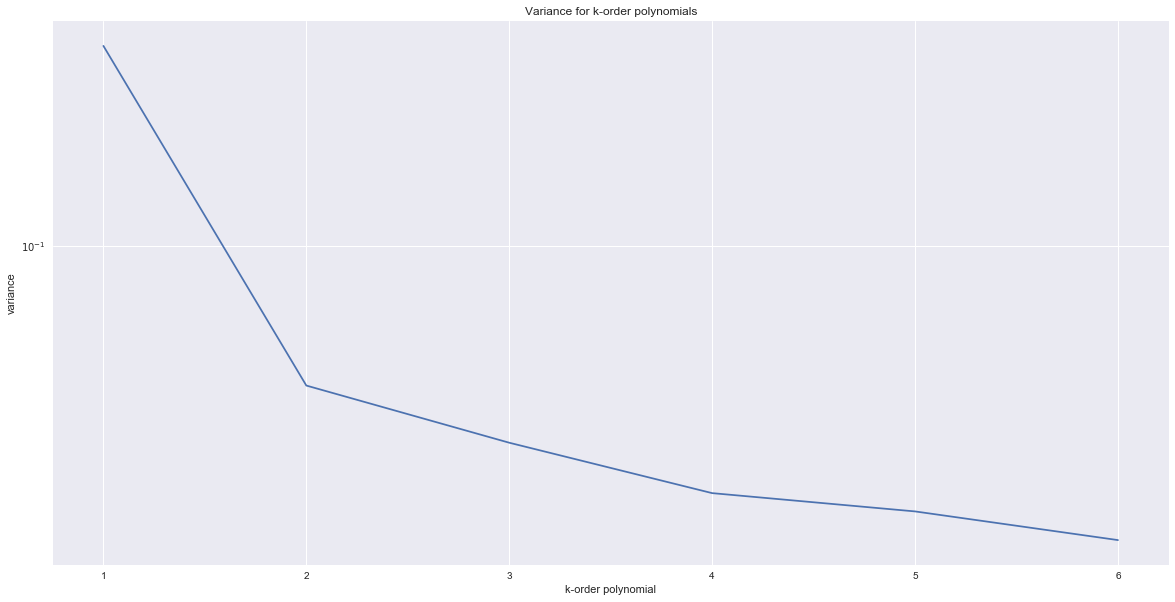

In [86]:
plt.plot(np.arange(order)+1, sigmasquares)
plt.title("Variance for k-order polynomials")
plt.xlabel("k-order polynomial")
plt.ylabel("variance")
plt.yscale("log")
plt.show()

We perform a LOO CV analysis for maximum likelihood for polynomials of order 0 to 8.

[ 0.28911154  0.06243185  0.05659436  0.05295194  0.06097492  0.0641232
  0.07890082  0.07819331]


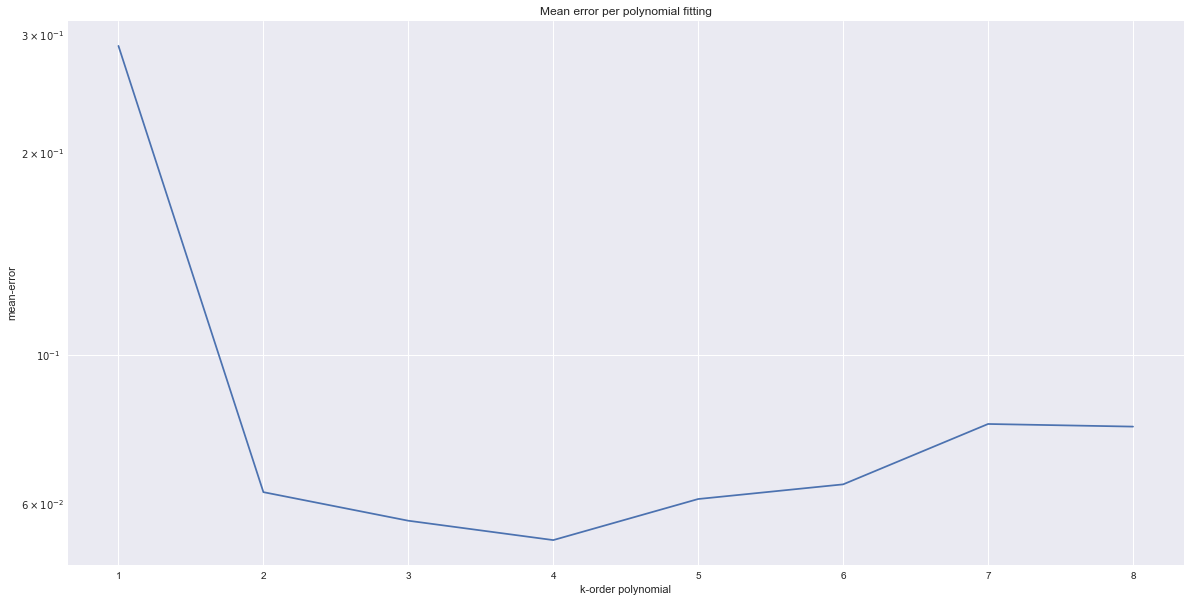

In [87]:
order = 8
orders = np.array(range(order))
avg_err = np.zeros(order)
for k in orders:
    avg_err[k] = cross_validation(x, t, k)
    
print(avg_err)

plt.plot(orders+1, avg_err)
plt.title("Mean error per polynomial fitting")
plt.xlabel("k-order polynomial")
plt.ylabel("mean-error")
plt.yscale("log")
plt.show()

### Uncertainty in estimates

For the ﬁrst order polynomial, compute $\mathrm{cov}\{ \hat{\mathbf{w}}\}$ (use $\hat{\sigma}^2$ in place of $\sigma^2$):

\begin{equation}
\mathrm{cov}\{ \hat{\mathbf{w}}\} = \sigma^2 (\mathbf{X}^T\mathbf{X})^{-1}
\end{equation}

In [88]:
def covariance(X, sigmasquare):
    return sigmasquare.mean()*np.linalg.inv(X.T.dot(X))

In [89]:
X = matrixOrder(x, 1)
cov = covariance(X, sigmasquare(X, t))
print(cov)

[[  6.69444553e-03  -3.42819760e-04]
 [ -3.42819760e-04   2.43262379e-05]]


In [90]:
def gausssamp(mu, sigma, N, sigmachol = None):
    if sigmachol is None:
        sigmachol = np.linalg.cholesky(sigma).transpose()
    q = np.random.rand(len(mu),N)
    g = np.matlib.repmat(mu,1,N)+ sigmachol.dot(q)
    return np.transpose(g)

In [91]:
coW = sigmasquare(X, t).mean()*(np.linalg.inv(X.T.dot(X)))
samps = gausssamp(lsfitVectorForm(X, t), coW, 10)
samps = np.transpose(samps)
print(samps)

[[ 11.14500402  11.16121354  11.1633995   11.20137273  11.15450779
   11.14785262  11.16684936  11.18830197  11.17844702  11.14600638]
 [ -0.05234303  -0.05155356  -0.05123474  -0.0531068   -0.05318836
   -0.05174102  -0.05248991  -0.05093007  -0.05287696  -0.05271634]]


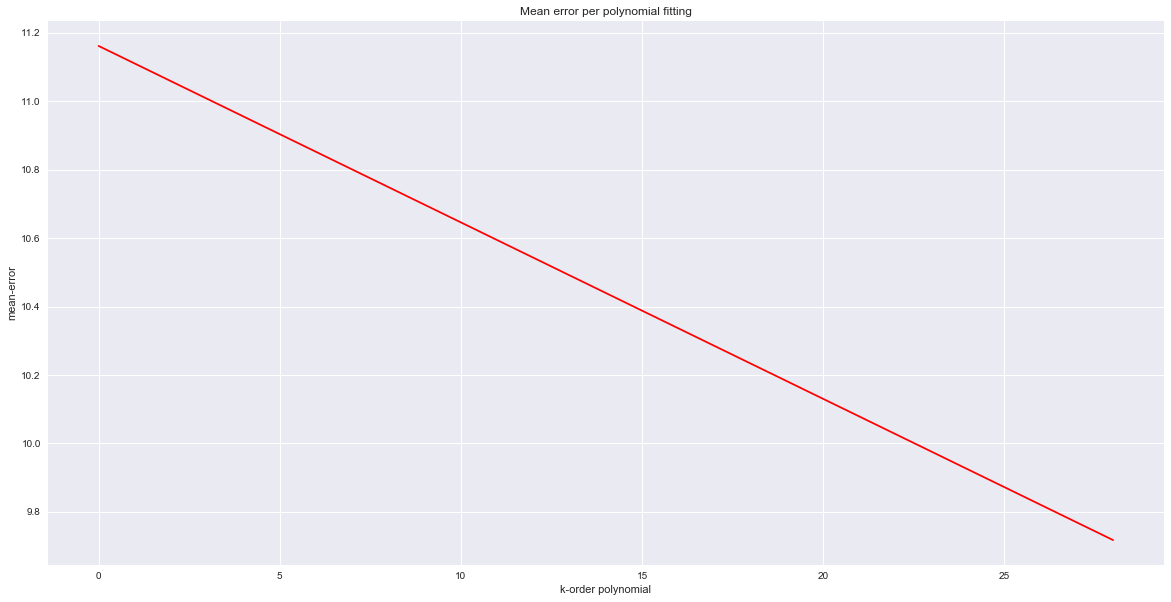

In [92]:
plt.plot(x, X.dot(samps[:,1]), "r")
plt.title("Mean error per polynomial fitting")
plt.xlabel("k-order polynomial")
plt.ylabel("mean-error")
plt.show()

### Uncertainty in predictions

In [93]:
synthetic_data = sio.loadmat("Lab1/files_lab_lin_reg_bayes/synthetic_data.mat")

In [94]:
x = np.array(synthetic_data["x"])
t = np.array(synthetic_data["t"])
testx = synthetic_data["testx"]

#we pick a polynomial order between 1 and 7
order = 7

Predictive means are called tnew, variances vnew. Both are vectors of the same size (and orientation!)

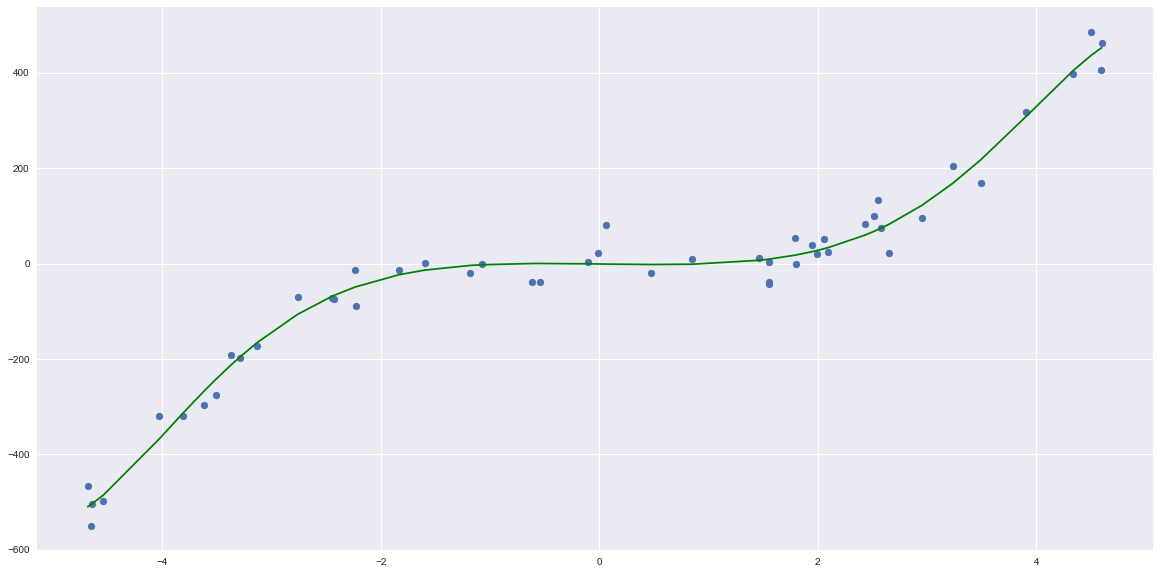

In [95]:
X = matrixOrder(x, order).reshape((50,8))
w_hat = lsfitVectorForm(X, t)
ss = sigmasquare(X, t)

fig, ax = plt.subplots()
points = ax.scatter(x, t)

fit = ax.plot(x, (X.dot(w_hat)), color='green')

plt.show()

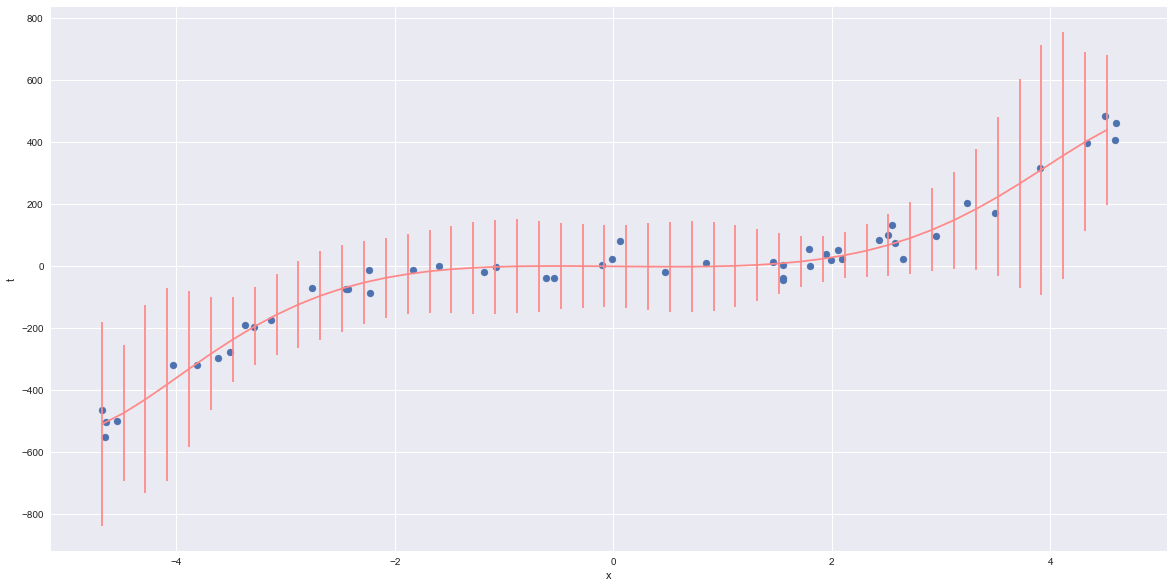

In [96]:
X_new = matrixOrder(testx, order).reshape((47,8))
t_new = X_new.dot(w_hat)
#ss_new = np.zeros(len(t_new.T))

ss_new = np.zeros(X_new.shape[0])
i = 0
for x_new in X_new:
    # x_new should be a column vector, thus we invert the equation
    ss_new[i] = (ss*x_new.T.dot(np.linalg.inv(X.T.dot(X))).dot(x_new))
    i += 1

fig, ax = plt.subplots()
points = ax.scatter(x, t)
# errorbar does not accept np.matrices, only ndarray
err = ax.errorbar(testx, t_new, yerr=ss_new, color='#ff8888')

ax.set_xlabel('x')
ax.set_ylabel('t')

plt.show()

In [97]:
synthetic_data2 = sio.loadmat("Lab1/files_lab_lin_reg_bayes/synthetic_data_2.mat")

In [98]:
x = np.array(synthetic_data2["x"])
t = np.array(synthetic_data2["t"])
testx = synthetic_data2["testx"]

#we pick a polynomial order between 1 and 7
order = 7

Predictive means are called tnew, variances vnew. Both are vectors of the same size (and orientation!)

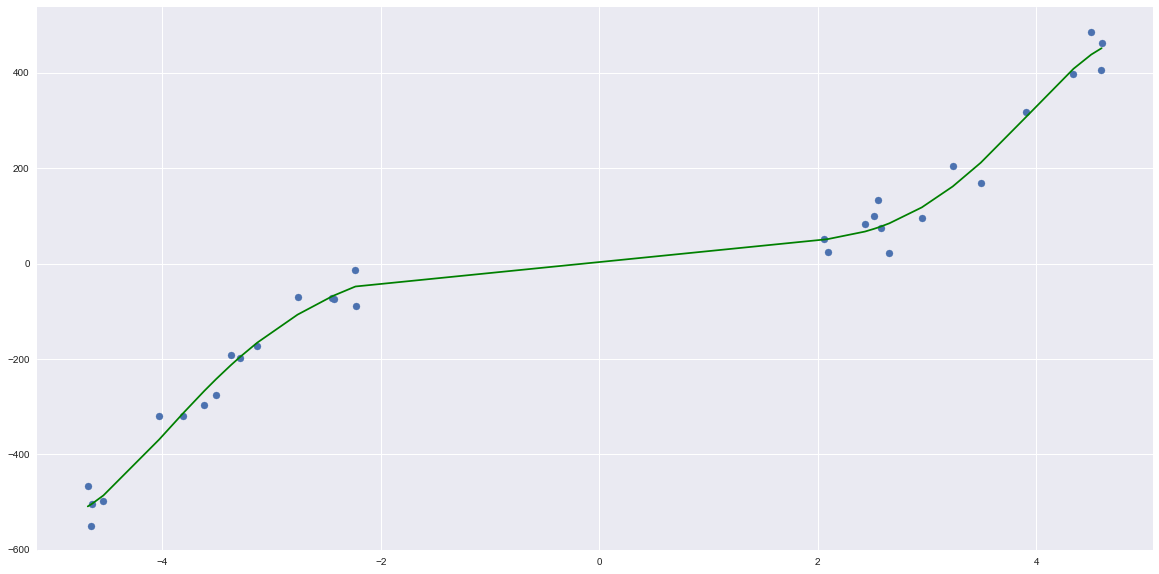

In [99]:
X = matrixOrder(x, order).reshape((31,8))
w_hat = lsfitVectorForm(X, t)
ss = sigmasquare(X, t)

fig, ax = plt.subplots()
points = ax.scatter(x, t)

fit = ax.plot(x, (X.dot(w_hat)), color='green')

plt.show()

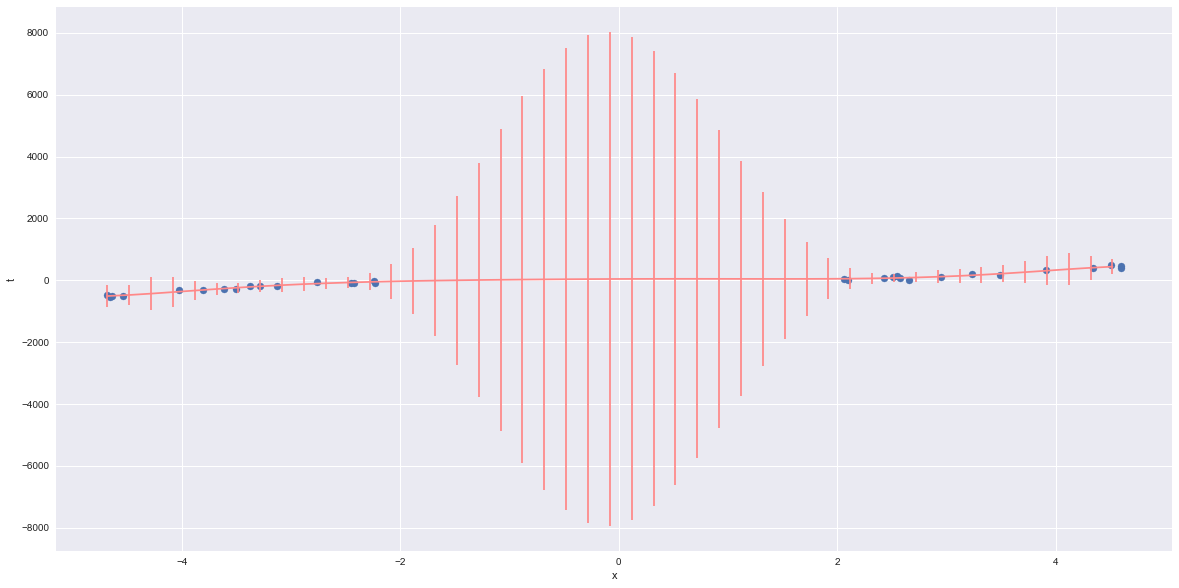

In [100]:
X_new = matrixOrder(testx, order).reshape((47,8))
t_new = X_new.dot(w_hat)
#ss_new = np.zeros(len(t_new.T))

ss_new = np.zeros(X_new.shape[0])
i = 0
for x_new in X_new:
    # x_new should be a column vector, thus we invert the equation
    ss_new[i] = (ss*x_new.T.dot(np.linalg.inv(X.T.dot(X))).dot(x_new))
    i += 1

fig, ax = plt.subplots()
points = ax.scatter(x, t)
err = ax.errorbar(testx, t_new, yerr=ss_new, color='#ff8888')

ax.set_xlabel('x')
ax.set_ylabel('t')

plt.show()

## Bayesian inference for a coin tossing experiment

### Computing posteriors

The beta probability density function is deﬁned as:

\begin{equation}
p(r\mid\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}r^{\alpha-1}(1-r)^{\beta-1}
\end{equation}

where $0 \le r \le 1$ and $\alpha,  \beta> 0$.

$r$ is the probability of some hypothetical coin landing heads. The beta distribution is a suitable prior distribution for $r$. Choosing 2 diﬀerent pairs of values $\alpha$ and $\beta$ we can plot the corresponding densities.

In [101]:
def plotbeta(alp, bet):
    x = np.array(np.arange(start=0, stop=1, step=0.01))
    plt.plot(x, beta.pdf(x, alp, bet), "r")
    plt.title("beta pdf: alpha =" + str(alp) + "beta=" + str(bet))
    plt.show()
    
def coin1(N):
    return np.sum(np.random.rand(N, 1)<=0.3)

def coin2(N):
    return np.sum(np.random.rand(N, 1)<=0.8)

def posteriorDensity(alp, bet):
    return None

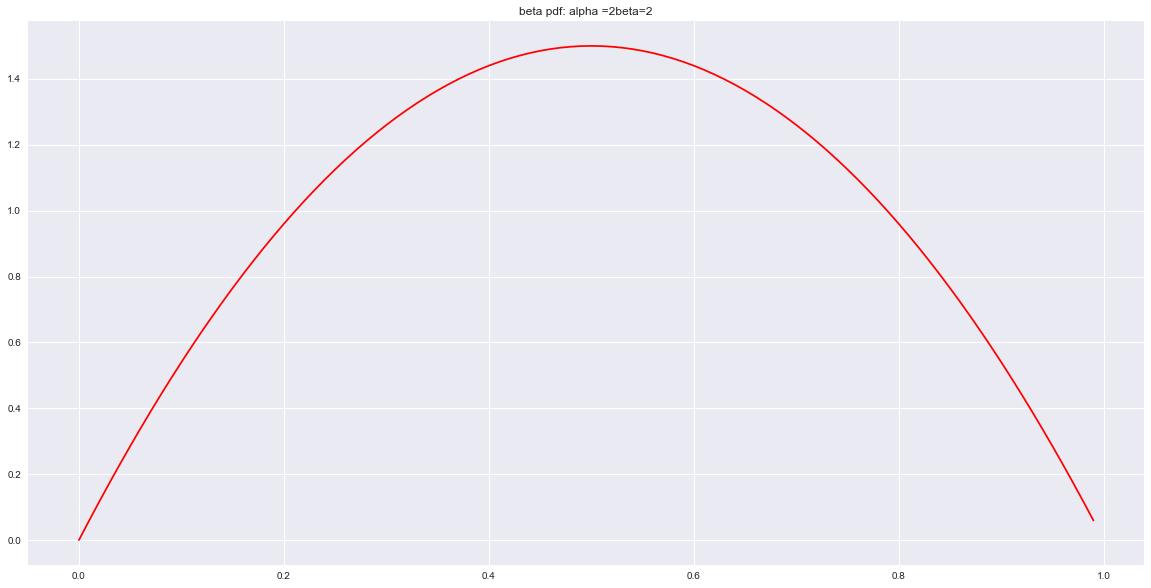

In [103]:
a = 2
b = 2
plotbeta(a,b)

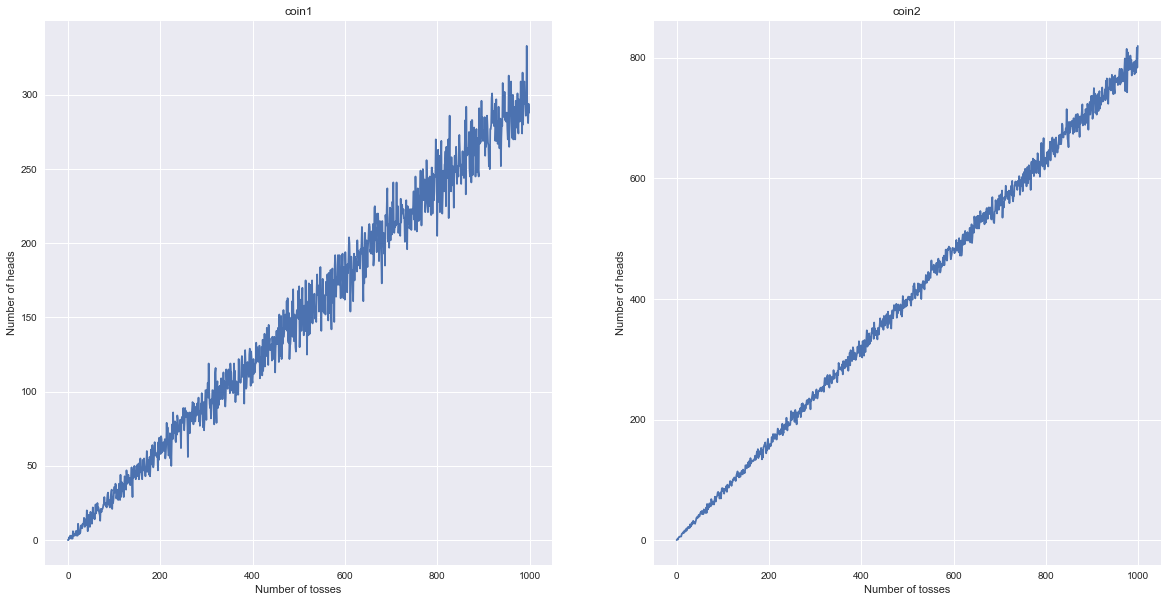

In [104]:
N = 1000
yn1 = [coin1(_) for _ in range(N)]
yn2 = [coin2(_) for _ in range(N)]
plt.figure(figsize=(20,10))
plt.subplot("121")
plt.plot(np.arange(N), yn1)
plt.xlabel("Number of tosses")
plt.ylabel("Number of heads")
plt.title("coin1")
plt.subplot("122")
plt.plot(np.arange(N), yn2)
plt.xlabel("Number of tosses")
plt.ylabel("Number of heads")
plt.title("coin2")
plt.show()

<div class="alert alert-success">
We can see that for the first coin, out of 10000 tosses, approximately 3000 are heads instead for the second approximately 8000. That gives a probability of approx. 0.3 and 0.8.
<br>Let's plot the posterior density.
</div>

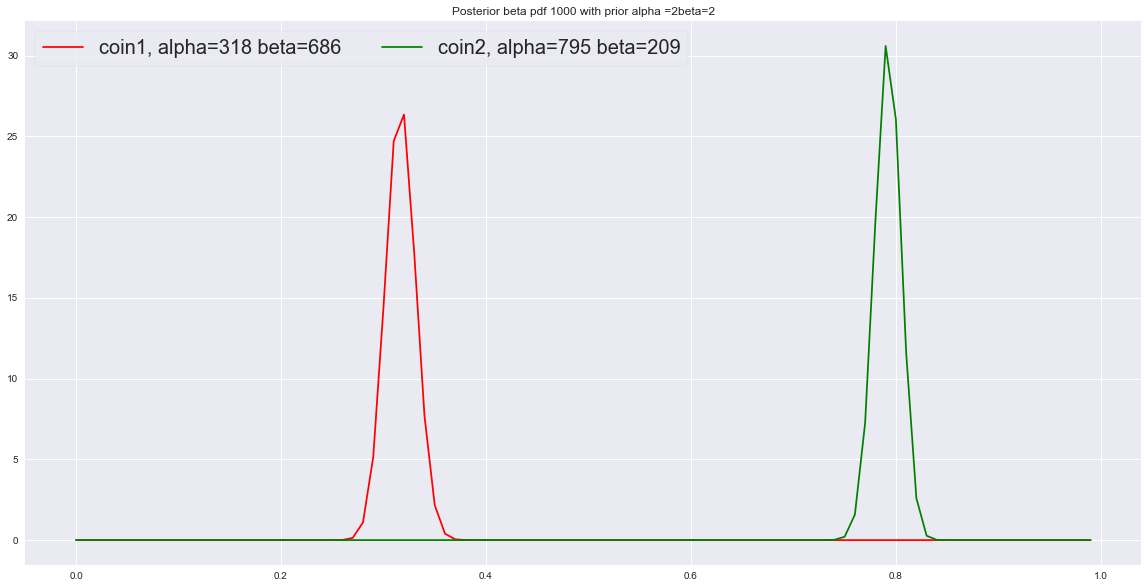

In [108]:
yn1, yn2 = coin1(N), coin2(N)
gamma1, gamma2 = yn1 + a, yn2 + a
delta1, delta2 = b + N - yn1, b + N - yn2

#not using plotbeta because I want to plot the posterior of both coins on same plot
x = np.array(np.arange(start=0, stop=1, step=0.01))
plt.plot(x, beta.pdf(x, gamma1, delta1), "r-", \
         label="coin1, alpha=" + str(gamma1) + " beta=" + str(delta1))
plt.plot(x, beta.pdf(x, gamma2, delta2), "g-", \
         label="coin2, alpha=" + str(gamma2) + " beta=" + str(delta2))
plt.legend(ncol=2, loc='upper left', frameon=True, fontsize=20)
plt.title("Posterior beta pdf " + str(N) + " with prior alpha =" + str(alp) + "beta=" + str(bet))
plt.show()

<div class="alert alert-success">
Repeat the previous exercise with a diﬀerent set of prior parameter values ($\alpha$ and $\beta$). What do you notice?
</div>

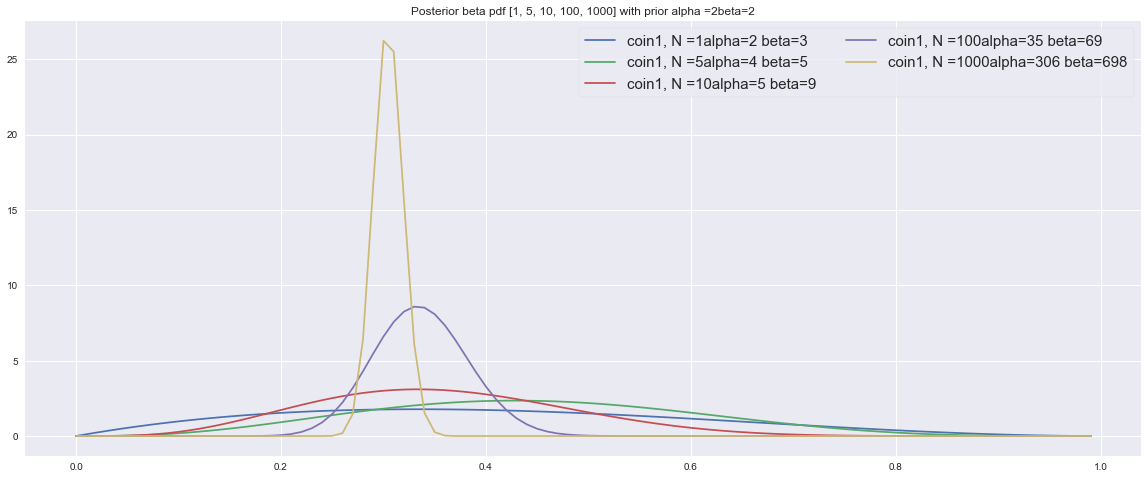

In [134]:
N = [1, 5, 10, 100, 1000]

plt.figure(figsize=(20,8))

for _ in N:
    yn1 = coin1(_)
    gamma = yn1 + a
    delta = b + _ - yn1
    plt.plot(x, beta.pdf(x, gamma, delta), \
             label="coin1, N =" + str(_) + "alpha=" + str(gamma) + " beta=" + str(delta))
    
plt.title("Posterior beta pdf " + str(N) + " with prior alpha =" + str(alp) + "beta=" + str(bet))
plt.legend(ncol=2, loc='upper right', frameon=True, fontsize=15)
plt.show()

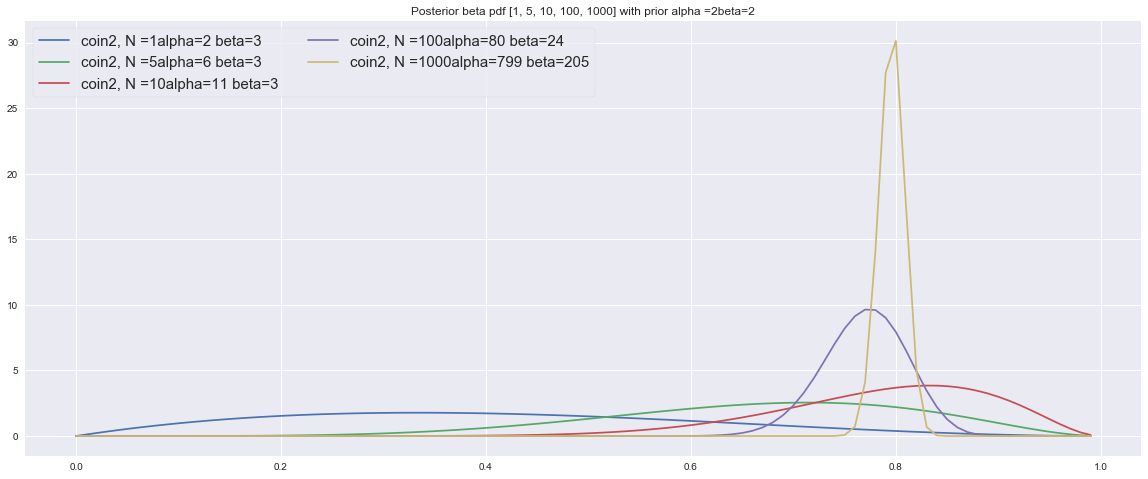

In [137]:
N = [1, 5, 10, 100, 1000]

plt.figure(figsize=(20,8))

for _ in N:
    yn2 = coin2(_)
    gamma = yn2 + a
    delta = b + _ - yn2
    plt.plot(x, beta.pdf(x, gamma, delta), \
             label="coin2, N =" + str(_) + "alpha=" + str(gamma) + " beta=" + str(delta))
    
plt.title("Posterior beta pdf " + str(N) + " with prior alpha =" + str(alp) + "beta=" + str(bet))
plt.legend(ncol=2, loc='upper left', frameon=True, fontsize=15)
plt.show()